# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file produced by **`CoCo lcfit`**, the `recon/$SNNAME.dat`, using the **`LCFitClass`** in isolation, as well as through the main **`SNClass`**. Additionally, the spectra produced by **`CoCo specfit`** will be explored using both **`specfitClass`** and **`SNClass`**.

In [16]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

___

## Reconstructed Light Curves
___
Light curve fits produced by **`CoCo lcfit`** are stored in a **`LCFitClass`** object, which can be read in by passing a path to **`LCfitClass.load_formatted_phot`**, like so:

In [17]:
L = pcc.LCfitClass()
print("recon directory is: ", L.recon_directory)
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh_Bessell.dat'))
print("recon filename is: ", recon_filename)
L.load_formatted_phot(recon_filename)

## at the moment the unpacking into individual filters needs to be done by hand 
L.unpack()

recon directory is:  /Users/berto/Code/CoCo/recon
recon filename is:  /Users/berto/Code/CoCo/recon/SN2011dh_Bessell.dat


___

We can look at which bands were fitted by checking the keys:

In [18]:
L.data_filters.keys()

['BessellB', 'BessellI', 'BessellR', 'BessellV']

___
Each of the data_filters is a **`pycoco FilterClass`** object, for example, Bessell B

In [19]:
L.data_filters['BessellB'].__dict__

{'_filter_file_path': '/Users/berto/Code/CoCo/data/filters/BessellB.dat',
 '_lower_edge': 3600.0,
 '_plot_colour': '#0000ff',
 '_upper_edge': 5600.0,
 '_wavelength_units': Unit("Angstrom"),
 'filter_name': 'BessellB',
 'lambda_effective': <Quantity 4354.410549343705 Angstrom>,
 'throughput': array([ 0.   ,  0.03 ,  0.134,  0.567,  0.92 ,  0.978,  1.   ,  0.978,
         0.935,  0.853,  0.74 ,  0.64 ,  0.536,  0.424,  0.325,  0.235,
         0.15 ,  0.095,  0.043,  0.009,  0.   ]),
 'wavelength': array([ 3600.,  3700.,  3800.,  3900.,  4000.,  4100.,  4200.,  4300.,
         4400.,  4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,
         5200.,  5300.,  5400.,  5500.,  5600.]),
 'wavelength_u': <Quantity [ 3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
             4500., 4600., 4700., 4800., 4900., 5000., 5100., 5200., 5300.,
             5400., 5500., 5600.] Angstrom>}

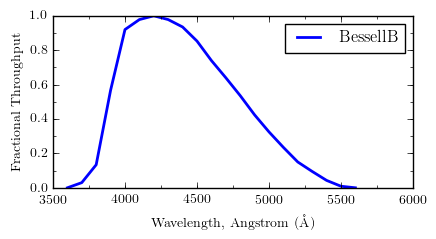

In [20]:
L.data_filters['BessellB'].plot(small = True)

if we want to plot the fits, we can simply use **`plot()`**

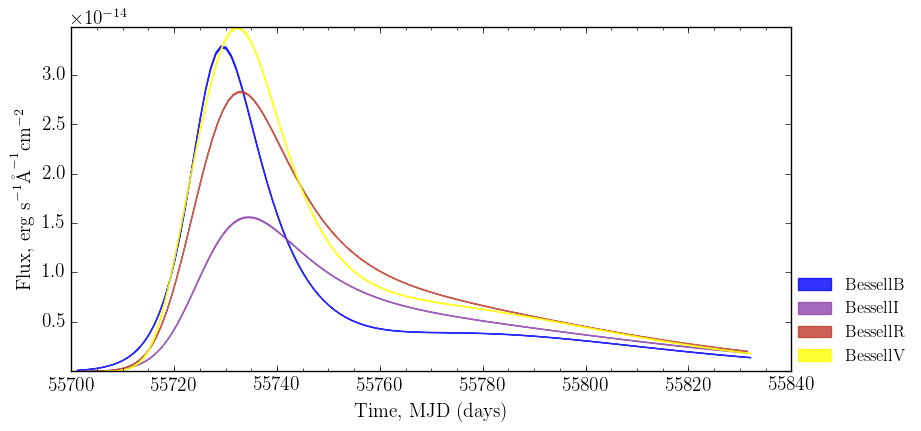

In [21]:
L.plot()

In [22]:
# L.get_fit_splines()

___
## Mangled and Reconstructed Spectra
___

Mangled and reconstructed spectra are dealt with using the **`specfitClass`**, this, like **`SpectrumClass`**, inherits from **`BaseSpectrumClass`**, so behaves in a very similar way.

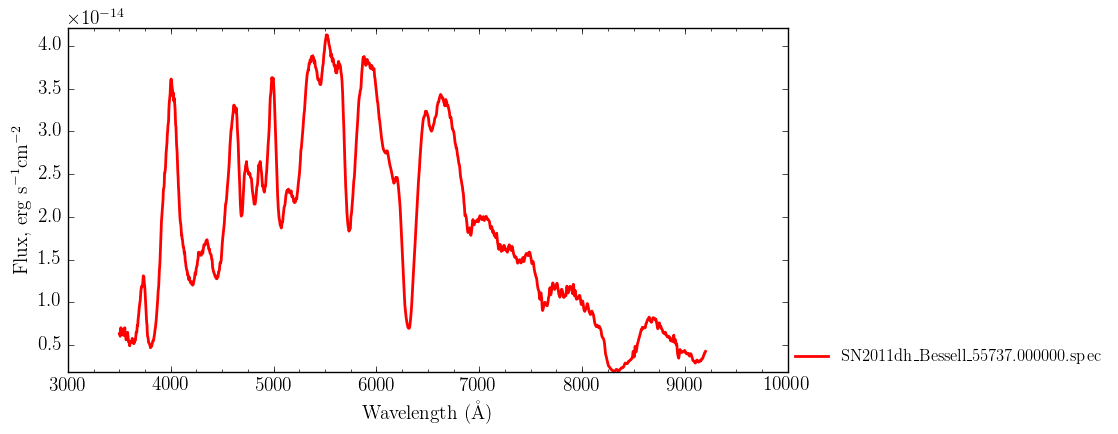

In [23]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55737.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)

## at the moment, the orig_specpath is stored as a one-line comment in the recon .spec file, and 
## this must be extracted manually
mS.set_orig_specpath()
mS.plot()

### Comparing to Original
___

One of the most common operations we will use is a comparision to the original spectrum. We can do this using **`SNClass`**.

# Using **`SNClass`** to Interact with Fits
___

first we must set up our **`SNClass`**:

In [24]:
sn = pcc.SNClass('SN2011dh_Bessell')
sn.load_phot()
print(sn.name)
recon_filename = os.path.abspath(os.path.join('/Users/berto/Code/CoCo/recon/', 'SN2011dh_Bessell.dat'))
sn.get_lcfit(recon_filename)

/Users/berto/Code/verbose-enigma/testdata/lc/SN2011dh_Bessell.dat
SN2011dh_Bessell


In [25]:
## Load in spectra - can take a few seconds for large datasets
sn.load_list("/Users/berto/Code/CoCo/SN2011dh.list")
sn.load_spec()

Double check that the spectra have loaded in ok

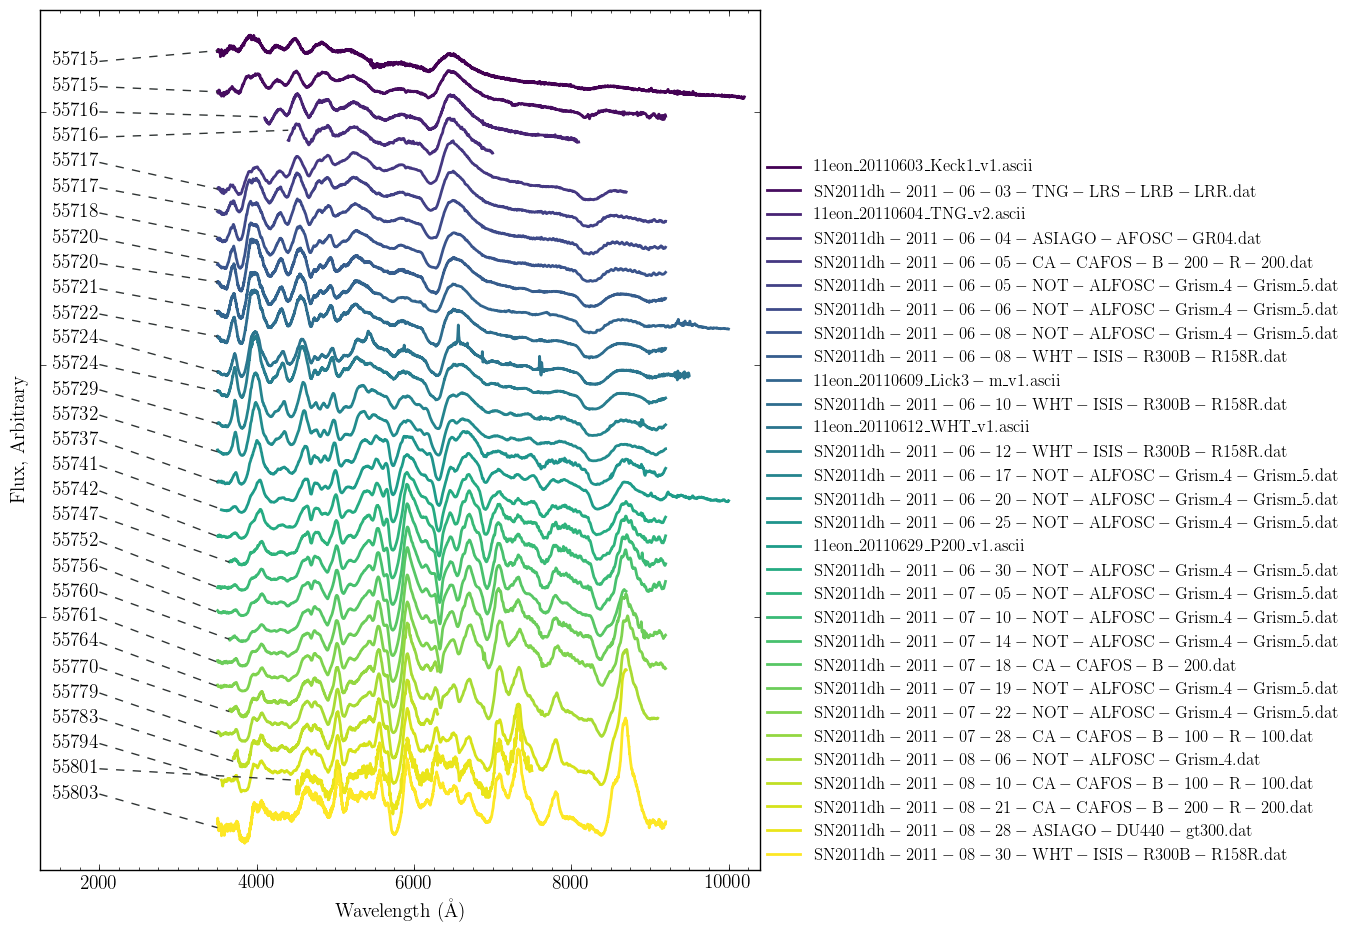

In [26]:
sn.plot_spec()

Looks good, now we can look for the relevant spectra. We can find a list of matches in a given directory using **`pycoco.find_recon_spec(...)`**:

In [27]:
pcc.find_recon_spec('/Users/berto/Code/CoCo/recon/', sn.name)

array(['SN2011dh_Bessell_55715.000000.spec',
       'SN2011dh_Bessell_55716.000000.spec',
       'SN2011dh_Bessell_55717.000000.spec',
       'SN2011dh_Bessell_55718.000000.spec',
       'SN2011dh_Bessell_55720.000000.spec',
       'SN2011dh_Bessell_55721.000000.spec',
       'SN2011dh_Bessell_55722.000000.spec',
       'SN2011dh_Bessell_55724.000000.spec',
       'SN2011dh_Bessell_55729.000000.spec',
       'SN2011dh_Bessell_55732.000000.spec',
       'SN2011dh_Bessell_55737.000000.spec',
       'SN2011dh_Bessell_55741.000000.spec',
       'SN2011dh_Bessell_55742.000000.spec',
       'SN2011dh_Bessell_55747.000000.spec',
       'SN2011dh_Bessell_55752.000000.spec',
       'SN2011dh_Bessell_55756.000000.spec',
       'SN2011dh_Bessell_55760.000000.spec',
       'SN2011dh_Bessell_55761.000000.spec',
       'SN2011dh_Bessell_55764.000000.spec',
       'SN2011dh_Bessell_55779.000000.spec',
       'SN2011dh_Bessell_55794.000000.spec',
       'SN2011dh_Bessell_55801.000000.spec',
       'SN

These are the appropriate recon files, the names have changed from the originals (seen in the sn keys and the time-series plot above) to **`CoCo`**'s internal format. Fortunately, the original filepath is stored in a header comment, e.g. for `'SN2011dh_Bessell_55715.000000.spec'`:
```
# data/spec/SN2011dh/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat
3301.66 1.95752e-15 5.86842e-17 
3304.32 2.22886e-15 5.96319e-17 
3306.98 2.60175e-15 6.13945e-17 
3309.63 2.87547e-15 5.90169e-17 
3312.29 2.67592e-15 4.69962e-17 
3314.95 2.35496e-15 3.476e-17 
3317.61 2.22075e-15 2.71039e-17 
3320.27 2.40984e-15 2.42398e-17 
...
```



**`SNClass.get_specfit`** uses **`pycoco.find_recon_spec(...)`** to read in the relevant mangled spectra, into the OrderedDict **`SNClass.specfit`**, which can be accessed using the filename.

In [28]:
sn.get_specfit()
sn.specfit.keys()

['SN2011dh_Bessell_55715.000000.spec',
 'SN2011dh_Bessell_55716.000000.spec',
 'SN2011dh_Bessell_55717.000000.spec',
 'SN2011dh_Bessell_55718.000000.spec',
 'SN2011dh_Bessell_55720.000000.spec',
 'SN2011dh_Bessell_55721.000000.spec',
 'SN2011dh_Bessell_55722.000000.spec',
 'SN2011dh_Bessell_55724.000000.spec',
 'SN2011dh_Bessell_55729.000000.spec',
 'SN2011dh_Bessell_55732.000000.spec',
 'SN2011dh_Bessell_55737.000000.spec',
 'SN2011dh_Bessell_55741.000000.spec',
 'SN2011dh_Bessell_55742.000000.spec',
 'SN2011dh_Bessell_55747.000000.spec',
 'SN2011dh_Bessell_55752.000000.spec',
 'SN2011dh_Bessell_55756.000000.spec',
 'SN2011dh_Bessell_55760.000000.spec',
 'SN2011dh_Bessell_55761.000000.spec',
 'SN2011dh_Bessell_55764.000000.spec',
 'SN2011dh_Bessell_55779.000000.spec',
 'SN2011dh_Bessell_55794.000000.spec',
 'SN2011dh_Bessell_55801.000000.spec',
 'SN2011dh_Bessell_55803.000000.spec']

So, as above, to plot:

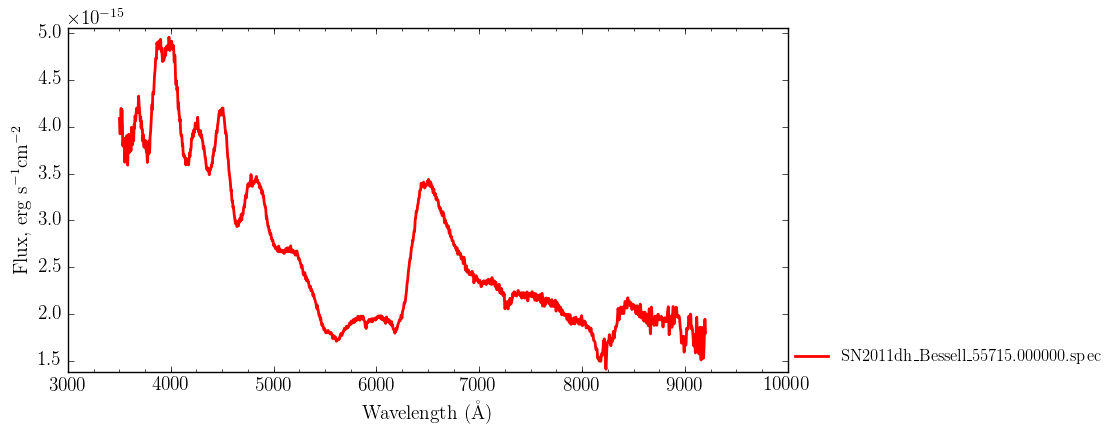

In [29]:
sn.specfit['SN2011dh_Bessell_55715.000000.spec'].plot()

As mentioned above, we can use the **`SNClass`** methods to compare spectra and their mangled product. One way of doing this is by using the **`specfitClass.plot_comparison(...)`** method, which takes another **`SpectrumClass`** instance:

{'_meta': OrderedDict([('comments', ['data/spec/SN2011dh/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat']), ('filepath', '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec'), ('filename', 'SN2011dh_Bessell_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x11048b1d0>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


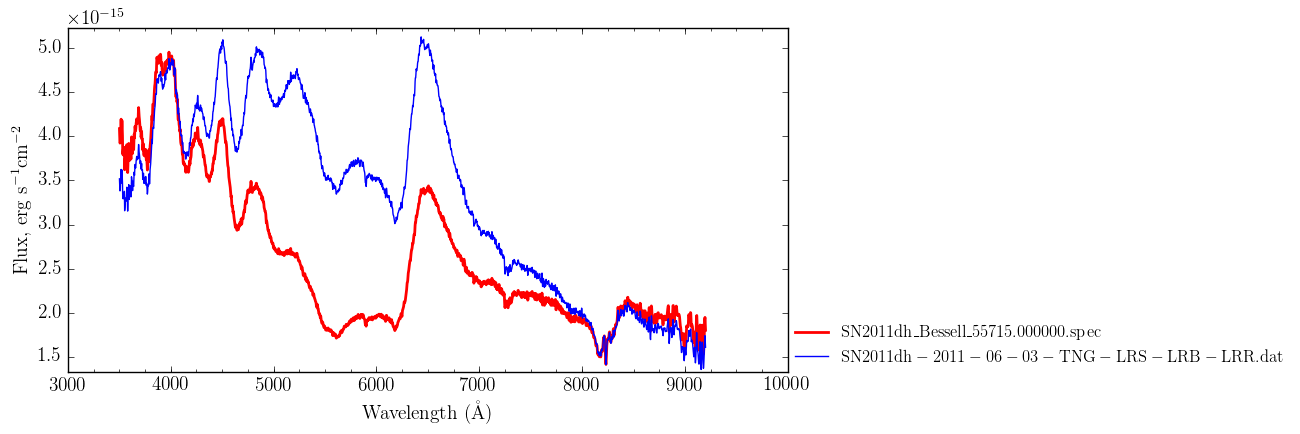

In [47]:
key_string = 'SN2011dh_Bessell_55715.000000.spec'
sn.specfit[key_string].plot_comparision(sn.spec[sn.specfit[key_string].orig_specpath])

(0, 2)

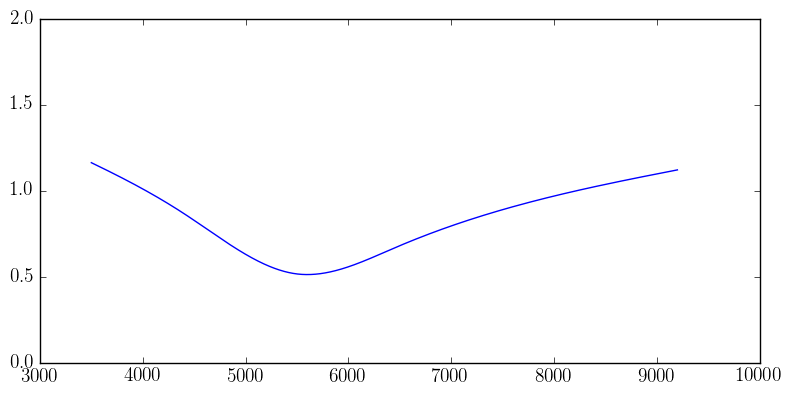

In [48]:
spline = sn.specfit[key_string].flux/sn.spec[sn.specfit[key_string].orig_specpath].flux
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)
ax1.plot(sn.specfit[key_string].wavelength, spline)

ax1.set_ylim(0,2)

{'_meta': OrderedDict([('comments', ['data/spec/SN2011dh/SN2011dh-2011-06-04-ASIAGO-AFOSC-GR04.dat']), ('filepath', '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55716.000000.spec'), ('filename', 'SN2011dh_Bessell_55716.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x109782d90>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


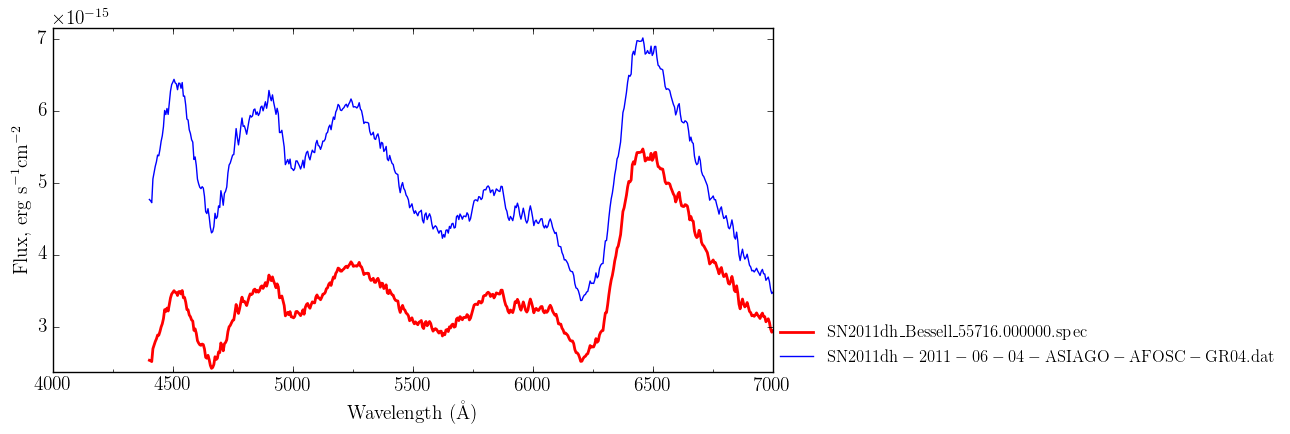

In [44]:
key_string = 'SN2011dh_Bessell_55716.000000.spec'
sn.specfit[key_string].plot_comparision(sn.spec[sn.specfit[key_string].orig_specpath])

(0, 2)

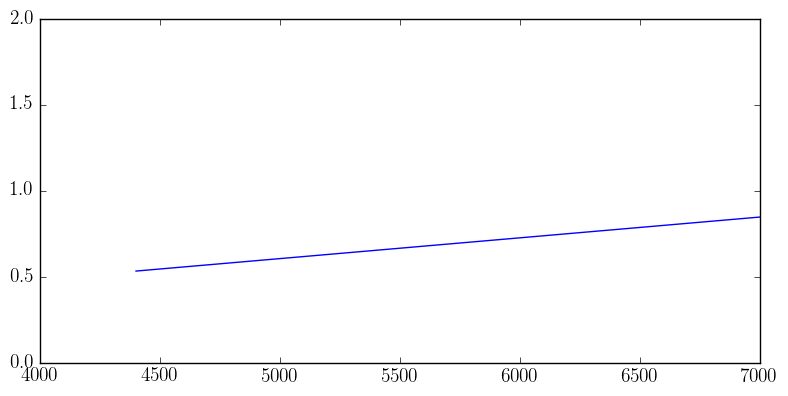

In [45]:
spline = sn.specfit[key_string].flux/sn.spec[sn.specfit[key_string].orig_specpath].flux
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)
ax1.plot(sn.specfit[key_string].wavelength, spline)

ax1.set_ylim(0,2)

{'_meta': OrderedDict([('comments', ['data/spec/SN2011dh/SN2011dh-2011-06-17-NOT-ALFOSC-Grism_4-Grism_5.dat']), ('filepath', '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55729.000000.spec'), ('filename', 'SN2011dh_Bessell_55729.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1109f9e10>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


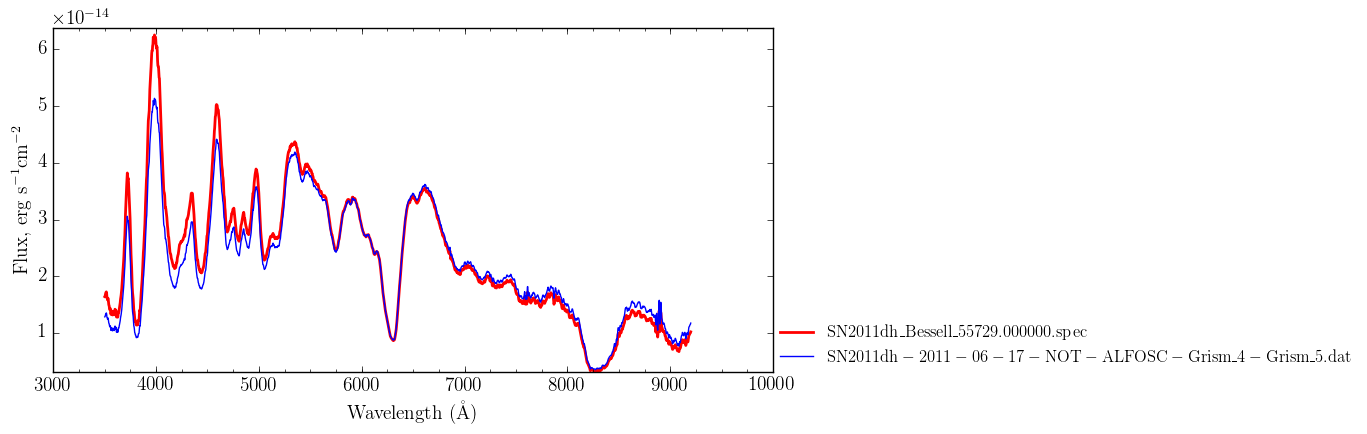

In [43]:
 key_string = 'SN2011dh_Bessell_55729.000000.spec'
sn.specfit[key_string].plot_comparision(sn.spec[sn.specfit[key_string].orig_specpath])

(0, 2)

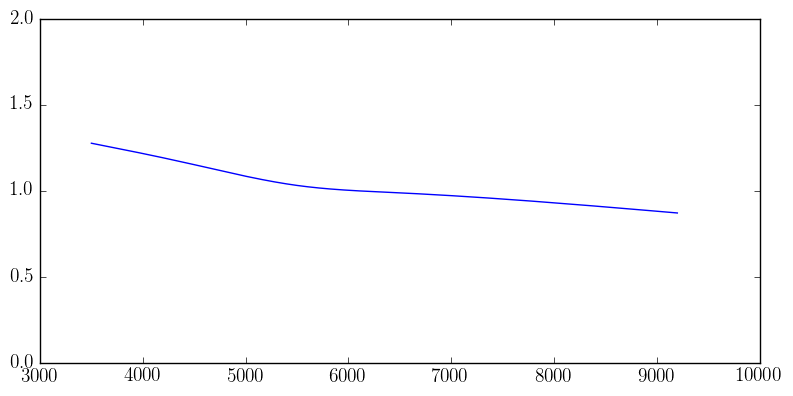

In [42]:
spline = sn.specfit[key_string].flux/sn.spec[sn.specfit[key_string].orig_specpath].flux
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)
ax1.plot(sn.specfit[key_string].wavelength, spline)

ax1.set_ylim(0,2)